In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()

In [2]:
zipcode = '97062'
filename = 'data/' + zipcode + '_homes_data_cleaned.csv'
df = pd.read_csv(filename)

In [3]:
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa
count,107,107,1.070000e+02,107.000000,107.000000,107.000000,107,107.000000,107,107,107,107,107,107
unique,107,107,NaN,NaN,NaN,NaN,2,NaN,2,1,2,2,2,2
top,4535 SW Saum Way,https://www.redfin.com/OR/Tualatin/4535-SW-Sau...,NaN,NaN,NaN,NaN,No,NaN,Yes,No,Single Family Residential,Washington County,No,No
freq,1,1,NaN,NaN,NaN,NaN,79,NaN,75,107,84,95,106,70
mean,NaN,NaN,6.331717e+05,3.233645,2.401869,2019.691589,NaN,1988.981308,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.514810e+05,0.853179,0.638539,1015.638245,NaN,12.489227,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.011000e+05,2.000000,1.000000,852.000000,NaN,1945.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.870000e+05,3.000000,2.000000,1319.000000,NaN,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.800000e+05,3.000000,2.500000,1737.000000,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,6.999000e+05,4.000000,2.500000,2380.000000,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['log_price'] = np.log(df['price'])

In [5]:
df.isnull().sum()

Address                0
link                   0
price                  0
beds                   0
baths                  0
sqft                   0
view_yn                0
yr_built               0
cooling_yn             0
senior_community_yn    0
style                  0
county                 0
new_construction_yn    0
has_hoa                0
log_price              0
dtype: int64

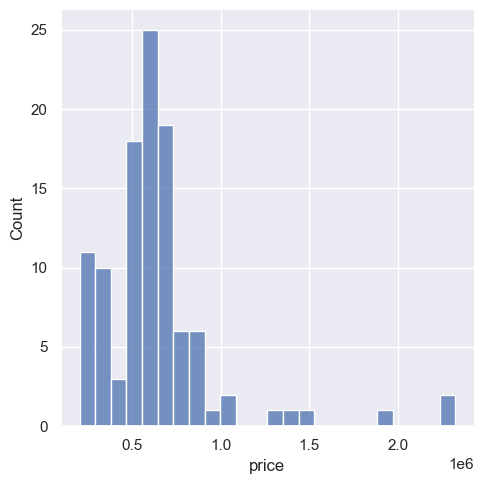

In [6]:
ax=sns.displot(df['price'])

In [7]:
q = df['price'].quantile(0.95)
df = df[df['price']<q]

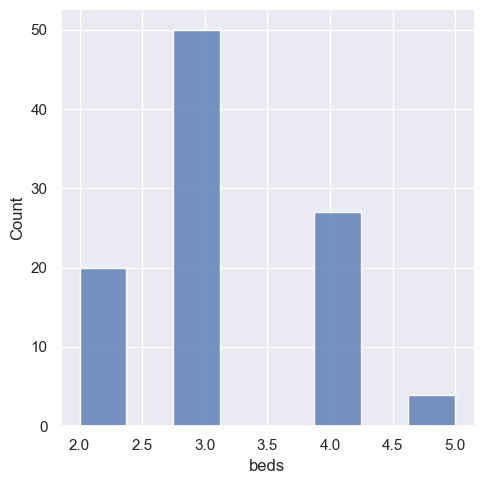

In [8]:
ax=sns.displot(df['beds'])

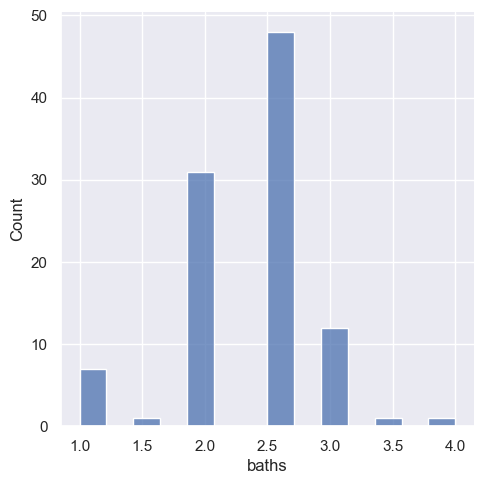

In [9]:
ax=sns.displot(df['baths'])

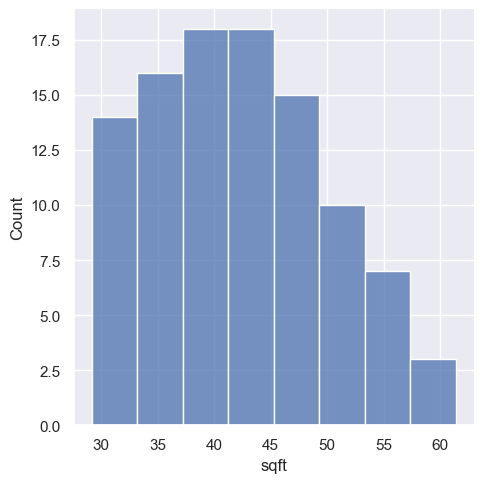

In [10]:
ax=sns.displot(np.sqrt(df['sqft']))

In [11]:
df['sqft'] = np.sqrt(df['sqft'])

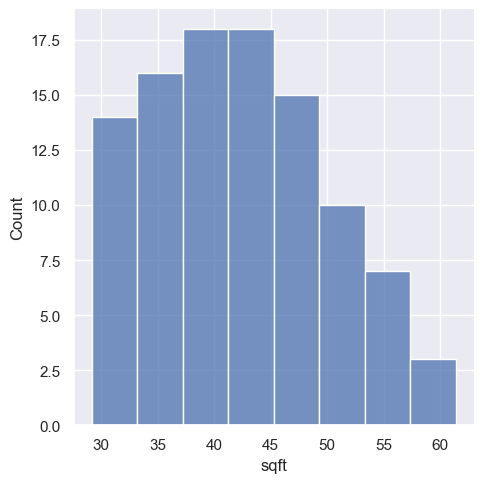

In [12]:
ax=sns.displot(df['sqft'])

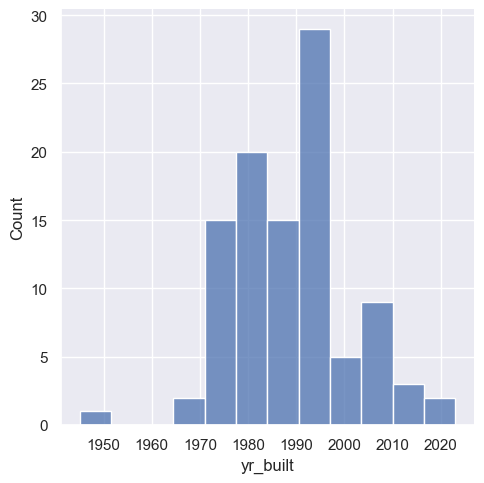

In [13]:
ax=sns.displot(df['yr_built'])

In [14]:
q = df['yr_built'].quantile(0.01)
df = df[df['yr_built']>q]

In [15]:
df = df.reset_index(drop=True)
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa,log_price
count,98,98,9.800000e+01,98.000000,98.000000,98.000000,98,98.000000,98,98,98,98,98,98,98.000000
unique,98,98,NaN,NaN,NaN,NaN,2,NaN,2,1,2,2,2,2,NaN
top,4535 SW Saum Way,https://www.redfin.com/OR/Tualatin/4535-SW-Sau...,NaN,NaN,NaN,NaN,No,NaN,Yes,No,Single Family Residential,Washington County,No,No,NaN
freq,1,1,NaN,NaN,NaN,NaN,78,NaN,67,98,75,93,97,63,NaN
mean,NaN,NaN,5.628303e+05,3.153061,2.336735,42.320655,NaN,1989.846939,NaN,NaN,NaN,NaN,NaN,NaN,13.174322
std,NaN,NaN,1.901339e+05,0.777944,0.511595,7.885319,NaN,11.784449,NaN,NaN,NaN,NaN,NaN,NaN,0.385366
min,NaN,NaN,2.011000e+05,2.000000,1.000000,29.189039,NaN,1971.000000,NaN,NaN,NaN,NaN,NaN,NaN,12.211558
25%,NaN,NaN,4.812500e+05,3.000000,2.000000,35.699239,NaN,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.084132
50%,NaN,NaN,5.730000e+05,3.000000,2.500000,41.448678,NaN,1989.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.258635
75%,NaN,NaN,6.737500e+05,4.000000,2.500000,47.468409,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.420609


## Checking OLS Assumptions

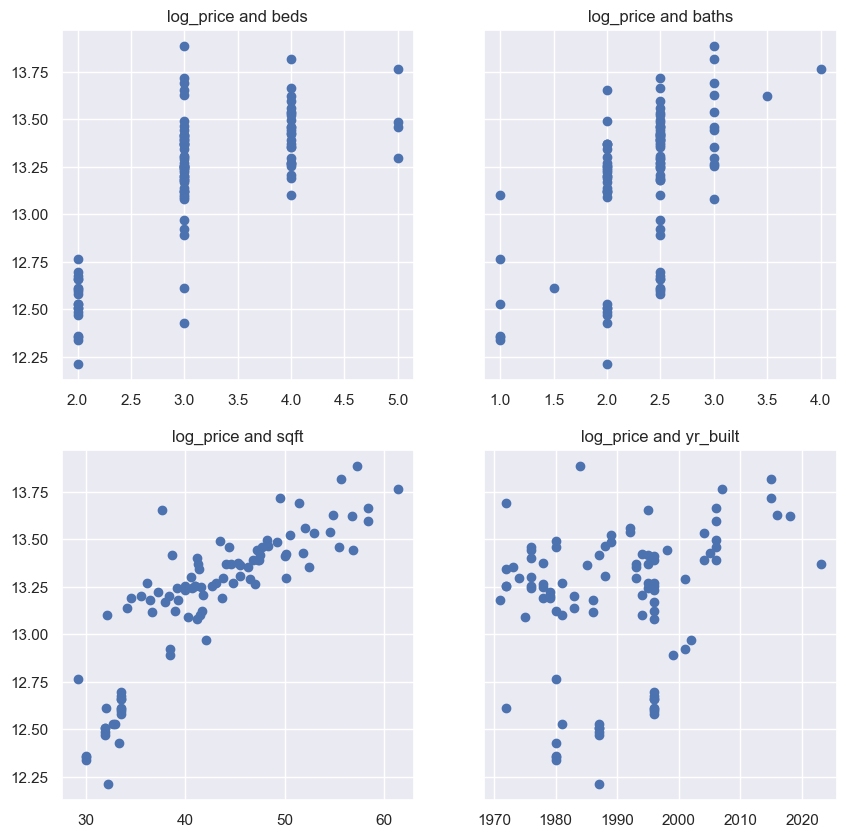

In [16]:
f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, sharey=True, figsize=(10, 10))
ax1.scatter(df['beds'], df['log_price'])
ax1.set_title('log_price and beds')
ax2.scatter(df['baths'], df['log_price'])
ax2.set_title('log_price and baths')
ax3.scatter(df['sqft'], df['log_price'])
ax3.set_title('log_price and sqft')
ax4.scatter(df['yr_built'], df['log_price'])
ax4.set_title('log_price and yr_built')

plt.show()

## Create Dummy variables

In [17]:
# Reorder columns
columns = ['Address', 'link', 'price', 'log_price', 'beds', 'baths', 'sqft', 'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style', 'county', 'new_construction_yn', 'has_hoa']
df = df[columns]
cleaned_df = df[columns]

In [18]:
df = pd.get_dummies(df, columns=df.columns[8:], drop_first=True)

In [19]:
df.head()

,Address,link,price,log_price,beds,baths,sqft,yr_built,view_yn_Yes,cooling_yn_Yes,style_Single Family Residential,county_Washington County,new_construction_yn_Yes,has_hoa_Yes
0,4535 SW Saum Way,https://www.redfin.com/OR/Tualatin/4535-SW-Sau...,760000,13.541074,4,3.0,54.561891,1992,0,0,1,0,0,0
1,8824 SW Talawa Dr,https://www.redfin.com/OR/Tualatin/8824-SW-Tal...,645000,13.377006,3,2.5,45.299007,1978,0,1,1,1,0,0
2,5105 SW Greenwood Cir,https://www.redfin.com/OR/Tualatin/5105-SW-Gre...,745000,13.521139,4,2.5,50.576674,1989,0,1,1,0,0,0
3,22305 SW Taylors Dr,https://www.redfin.com/OR/Tualatin/22305-SW-Ta...,666888,13.410377,3,2.5,50.039984,1996,0,1,1,1,0,0
4,7007 SW Robbins Rd,https://www.redfin.com/OR/Tualatin/7007-SW-Rob...,850000,13.652992,3,2.0,37.656341,1995,1,1,1,1,0,0


## Checking for multicollinearity

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[[ 'sqft', 'beds', 'yr_built', 'cooling_yn_Yes', 'style_Single Family Residential', 'county_Washington County', 'has_hoa_Yes']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [21]:
vif

,VIF,features
0,90.866076,sqft
1,51.127200,beds
2,91.149068,yr_built
3,6.166095,cooling_yn_Yes
4,20.323465,style_Single Family Residential
5,23.973681,county_Washington County
6,3.843794,has_hoa_Yes


## Linear Regression Model

In [22]:
targets = df['log_price']
inputs = df.drop(['Address', 'link', 'price', 'log_price', 'baths', 'log_price', 'new_construction_yn_Yes', 'view_yn_Yes'], axis=1)

### Scale the data

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [24]:
inputs_scaled = scaler.transform(inputs)

In [25]:
inputs_scaled

array([[ 1.09428616,  1.56039009,  0.18364295, -1.47013276,  0.55377492,
        -4.31277173, -0.74535599],
       [-0.19776256,  0.37965039, -1.01047142,  0.68021068,  0.55377492,
         0.23186945, -0.74535599],
       [ 1.09428616,  1.05239458, -0.0722387 ,  0.68021068,  0.55377492,
        -4.31277173, -0.74535599],
       [-0.19776256,  0.98398266,  0.52481849,  0.68021068,  0.55377492,
         0.23186945, -0.74535599],
       [-0.19776256, -0.59456003,  0.43952461,  0.68021068,  0.55377492,
         0.23186945, -0.74535599],
       [ 1.09428616,  1.23750185,  0.18364295,  0.68021068,  0.55377492,
         0.23186945, -0.74535599],
       [-1.48981127, -1.11154581,  0.52481849, -1.47013276, -1.8057878 ,
         0.23186945,  1.34164079],
       [-1.48981127, -1.31955903, -0.24282646, -1.47013276, -1.8057878 ,
         0.23186945,  1.34164079],
       [-0.19776256, -1.14391442, -0.83988365, -1.47013276, -1.8057878 ,
         0.23186945,  1.34164079],
       [ 1.09428616, -0.0652

### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=0)

### Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5.0)
ridge.fit(x_train, y_train)

Ridge(alpha=5.0)

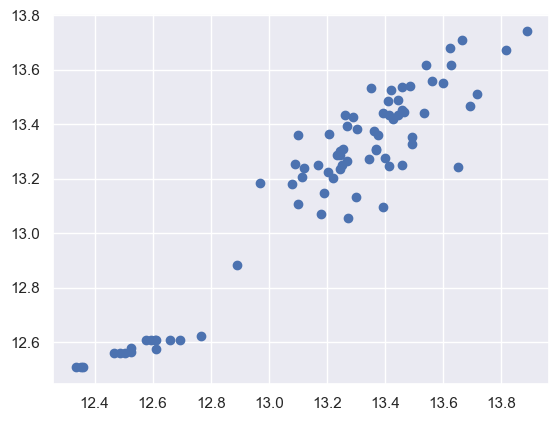

In [28]:
y_hat = ridge.predict(x_train)
plt.scatter(y_train, y_hat)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

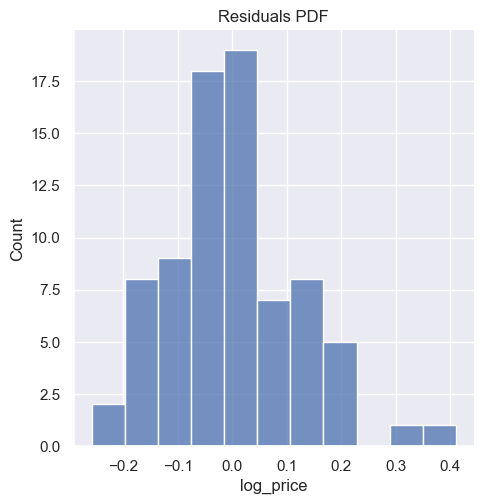

In [29]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF")

In [30]:
ridge.score(x_train, y_train)

0.899633743860806

In [31]:
ridge.score(x_test, y_test)

0.8856923993655945

In [32]:
def adj_r2(x,y):
    r2 = ridge.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [33]:
adj_r2(x_train, y_train)

0.8895971182468866

In [34]:
adj_r2(x_test, y_test)

0.8190129656621913

In [35]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = ((ridge.coef_ / scaler.scale_) - 1) * 100

In [36]:
from sklearn.feature_selection import f_regression
f_stat, p_values = f_regression(x_train, y_train)

In [37]:
reg_summary['f_stat'] = f_stat.round(3)
reg_summary['p_value'] = p_values.round(3)
reg_summary

,Features,Weights,f_stat,p_value
0,beds,-95.668266,89.914,0.000
1,sqft,-98.052683,192.412,0.000
2,yr_built,-99.814113,5.538,0.021
3,cooling_yn_Yes,-86.797612,57.744,0.000
4,style_Single Family Residential,-77.687108,194.820,0.000
5,county_Washington County,-113.949922,5.746,0.019
6,has_hoa_Yes,-115.922792,45.205,0.000


In [38]:
y_hat_test = ridge.predict(x_test)

## Test Dataset Error Plot

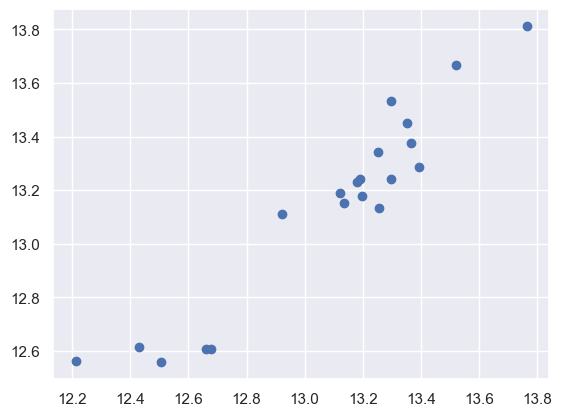

In [39]:
plt.scatter(y_test, y_hat_test)
plt.show()

In [40]:
df_pf = pd.DataFrame(y_hat_test, columns=['predictions'])

In [41]:
y_test = y_test.reset_index(drop=True)
df_pf['target'] = y_test
df_pf

,predictions,target
0,13.131820,13.255144
1,13.341140,13.251636
2,13.665462,13.521139
3,13.152404,13.136266
4,13.229472,13.180632
5,12.607381,12.676076
6,13.178929,13.199324
7,13.241442,13.296317
8,13.286816,13.392391
9,13.532113,13.296317


In [42]:
df_pf['residual'] = df_pf['target'] - df_pf['predictions']
df_pf['Difference%'] = (df_pf['residual']/df_pf['target']*100).round(2)
df_pf

,predictions,target,residual,Difference%
0,13.131820,13.255144,0.123325,0.93
1,13.341140,13.251636,-0.089504,-0.68
2,13.665462,13.521139,-0.144322,-1.07
3,13.152404,13.136266,-0.016138,-0.12
4,13.229472,13.180632,-0.048839,-0.37
5,12.607381,12.676076,0.068695,0.54
6,13.178929,13.199324,0.020395,0.15
7,13.241442,13.296317,0.054875,0.41
8,13.286816,13.392391,0.105575,0.79
9,13.532113,13.296317,-0.235796,-1.77


In [43]:
import scipy.stats as stats
SE_residual = np.sqrt(np.sum(df_pf['residual']**2) / (len(y_test) - x_test.shape[1]))
margin_error = SE_residual*stats.t.ppf(.9, len(x_test) - 1)
df_pf['lower_bound'] = df_pf['predictions'] - margin_error
df_pf['upper_bound'] = df_pf['predictions'] + margin_error
df_pf

,predictions,target,residual,Difference%,lower_bound,upper_bound
0,13.131820,13.255144,0.123325,0.93,12.916799,13.346841
1,13.341140,13.251636,-0.089504,-0.68,13.126119,13.556161
2,13.665462,13.521139,-0.144322,-1.07,13.450441,13.880483
3,13.152404,13.136266,-0.016138,-0.12,12.937383,13.367425
4,13.229472,13.180632,-0.048839,-0.37,13.014451,13.444493
5,12.607381,12.676076,0.068695,0.54,12.392360,12.822402
6,13.178929,13.199324,0.020395,0.15,12.963908,13.393950
7,13.241442,13.296317,0.054875,0.41,13.026421,13.456463
8,13.286816,13.392391,0.105575,0.79,13.071795,13.501837
9,13.532113,13.296317,-0.235796,-1.77,13.317092,13.747134


# Writing predictions to csv

In [44]:
predicted_price = ridge.predict(inputs_scaled)
cleaned_df['predicted_price'] = predicted_price
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cleaned_df['difference'] = cleaned_df['predicted_price'] - cleaned_df['price']
cleaned_df['difference%'] = 100*cleaned_df['difference']/cleaned_df['price']
column_order = ['Address', 'link', 'price', 'predicted_price', 'difference', 'difference%', 'beds', 'baths', 'sqft',
       'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style',
       'county', 'new_construction_yn', 'has_hoa']
cleaned_df = cleaned_df[column_order]
cleaned_df

,Address,link,price,predicted_price,difference,difference%,beds,baths,sqft,yr_built,view_yn,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa
0,4535 SW Saum Way,https://www.redfin.com/OR/Tualatin/4535-SW-Sau...,760000,13.62,-759986.38,-100.00,4,3.00,54.56,1992,No,No,No,Single Family Residential,Clackamas County,No,No
1,8824 SW Talawa Dr,https://www.redfin.com/OR/Tualatin/8824-SW-Tal...,645000,13.36,-644986.64,-100.00,3,2.50,45.30,1978,No,Yes,No,Single Family Residential,Washington County,No,No
2,5105 SW Greenwood Cir,https://www.redfin.com/OR/Tualatin/5105-SW-Gre...,745000,13.67,-744986.33,-100.00,4,2.50,50.58,1989,No,Yes,No,Single Family Residential,Clackamas County,No,No
3,22305 SW Taylors Dr,https://www.redfin.com/OR/Tualatin/22305-SW-Ta...,666888,13.49,-666874.51,-100.00,3,2.50,50.04,1996,No,Yes,No,Single Family Residential,Washington County,No,No
4,7007 SW Robbins Rd,https://www.redfin.com/OR/Tualatin/7007-SW-Rob...,850000,13.24,-849986.76,-100.00,3,2.00,37.66,1995,Yes,Yes,No,Single Family Residential,Washington County,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,20918 SW Winema Ct,https://www.redfin.com/OR/Tualatin/20918-SW-Wi...,566000,13.29,-565986.71,-100.00,3,2.50,41.57,1978,Yes,Yes,No,Single Family Residential,Washington County,No,No
94,8294 SW Mohawk St,https://www.redfin.com/OR/Tualatin/8294-SW-Moh...,227500,12.51,-227487.49,-99.99,2,1.00,30.07,1980,No,No,No,Condo/Co-op,Washington County,No,Yes
95,9435 SW Siletz Dr,https://www.redfin.com/OR/Tualatin/9435-SW-Sil...,575000,13.44,-574986.56,-100.00,4,3.00,47.01,1978,No,Yes,No,Single Family Residential,Washington County,No,No
96,21172 SW Iroquois Dr,https://www.redfin.com/OR/Tualatin/21172-SW-Ir...,552500,13.20,-552486.80,-100.00,3,2.00,37.23,1979,No,Yes,No,Single Family Residential,Washington County,No,No


In [45]:
cleaned_df.to_csv('predictions/97062log_ridge_predictions.csv')

In [46]:
d = {'beds': [3], 'baths': [2.5], 'sqft': [np.sqrt(2064)], 'cooling_yn_Yes': [1], 'style_Single Family Residential': [1], 'county_Washington County': [1], 'has_hoa_Yes': [1]}
gl_home = pd.DataFrame(data=d)
gl_home

,beds,baths,sqft,cooling_yn_Yes,style_Single Family Residential,county_Washington County,has_hoa_Yes
0,3,2.50,45.43,1,1,1,1


In [47]:
price = ridge.predict(gl_home)
price

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([14.70777838])

In [48]:
np.exp(price)

array([2440658.35727264])